In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('./pkl_files/df_tots.pkl')

In [3]:
df.head().T

Datetime,2014-01-01 07:41:00+00:00,2014-01-01 07:42:00+00:00,2014-01-01 07:42:00+00:00,2014-01-01 07:43:00+00:00,2014-01-01 07:43:00+00:00
Ambient Temperature [ºC],9.7,9.7,9.7,9.7,9.7
Global Radiation [W/m2],7.13115,7.04044,7.04044,6.59441,6.59441
Diffuse Radiation [W/m2],6.92915,6.84788,6.84788,6.67284,6.67284
Ultraviolet [W/m2],0.751824,0.78193,0.78193,0.813929,0.813929
Wind Velocity [m/s],0.7,0.666667,0.666667,0.616667,0.616667
Wind Direction [º],275.334,278.503,278.503,284.667,284.667
Current DC [A],0.19527,0.130512,0.0725,0.075,0.0525
PV Cell,A,B,A,A,B
Power DC [W],2.85095,2.38837,1.67475,1.7325,1.17338
Surface Temperature [ºC],9.4,9.7,9.4,9.4,9.7


In [4]:
df.describe()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
count,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06,1.236488e+06
mean,2.087393e+01,4.510952e+02,1.237005e+02,2.740742e+01,2.597943e+00,1.998093e+02,3.573051e+00,9.891582e+01,2.945720e+01,2.693634e+01
std,5.567262e+00,3.170598e+02,9.977101e+01,1.944455e+01,1.314048e+00,8.664973e+01,2.608150e+00,7.205573e+01,9.387964e+00,3.075815e+00
min,3.400000e+00,8.764930e-01,1.591053e+00,5.006730e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.200000e+00,1.010000e+01
25%,1.651667e+01,1.581803e+02,5.889961e+01,1.002260e+01,1.633333e+00,1.256611e+02,1.035000e+00,2.740500e+01,2.180000e+01,2.685000e+01
50%,2.090000e+01,4.233756e+02,9.572428e+01,2.441854e+01,2.516667e+00,2.196927e+02,3.335000e+00,9.490838e+01,2.960000e+01,2.755000e+01
75%,2.500000e+01,7.227458e+02,1.557552e+02,4.336762e+01,3.433334e+00,2.678315e+02,6.045000e+00,1.674450e+02,3.690000e+01,2.840000e+01
max,3.830000e+01,1.438887e+03,7.765521e+02,8.426602e+01,1.228333e+01,3.599992e+02,1.023750e+01,3.076369e+02,6.200000e+01,3.690000e+01


In [5]:
df.isnull().sum()

Ambient Temperature [ºC]    0
Global Radiation [W/m2]     0
Diffuse Radiation [W/m2]    0
Ultraviolet [W/m2]          0
Wind Velocity [m/s]         0
Wind Direction [º]          0
Current DC [A]              0
PV Cell                     0
Power DC [W]                0
Surface Temperature [ºC]    0
Voltage DC [V]              0
dtype: int64

In [6]:
1.236488e+06/10

123648.8

In [7]:
df['dt'] = df.index

In [8]:
df.dtypes

Ambient Temperature [ºC]                float64
Global Radiation [W/m2]                 float64
Diffuse Radiation [W/m2]                float64
Ultraviolet [W/m2]                      float64
Wind Velocity [m/s]                     float64
Wind Direction [º]                      float64
Current DC [A]                          float64
PV Cell                                  object
Power DC [W]                            float64
Surface Temperature [ºC]                float64
Voltage DC [V]                          float64
dt                          datetime64[ns, UTC]
dtype: object

In [9]:
df_a = df[df['PV Cell']=='A']
df_b = df[df['PV Cell']=='B']

In [10]:
#df_a.drop(columns=['PV Cell'])

In [11]:
df_a = df_a.groupby(pd.Grouper(freq='10min')).mean()
df_b = df_b.groupby(pd.Grouper(freq='10min')).mean()

In [12]:
df_a.isnull().sum(), df_b.isnull().sum()

(Ambient Temperature [ºC]    94597
 Global Radiation [W/m2]     94597
 Diffuse Radiation [W/m2]    94597
 Ultraviolet [W/m2]          94597
 Wind Velocity [m/s]         94597
 Wind Direction [º]          94597
 Current DC [A]              94597
 Power DC [W]                94597
 Surface Temperature [ºC]    94597
 Voltage DC [V]              94597
 dtype: int64,
 Ambient Temperature [ºC]    94628
 Global Radiation [W/m2]     94628
 Diffuse Radiation [W/m2]    94628
 Ultraviolet [W/m2]          94628
 Wind Velocity [m/s]         94628
 Wind Direction [º]          94628
 Current DC [A]              94628
 Power DC [W]                94628
 Surface Temperature [ºC]    94628
 Voltage DC [V]              94628
 dtype: int64)

In [13]:
df_a.dropna(thresh=5,inplace=True)
df_b.dropna(thresh=5,inplace=True)

In [14]:
df_a.isnull().sum(),df_b.isnull().sum()

(Ambient Temperature [ºC]    0
 Global Radiation [W/m2]     0
 Diffuse Radiation [W/m2]    0
 Ultraviolet [W/m2]          0
 Wind Velocity [m/s]         0
 Wind Direction [º]          0
 Current DC [A]              0
 Power DC [W]                0
 Surface Temperature [ºC]    0
 Voltage DC [V]              0
 dtype: int64,
 Ambient Temperature [ºC]    0
 Global Radiation [W/m2]     0
 Diffuse Radiation [W/m2]    0
 Ultraviolet [W/m2]          0
 Wind Velocity [m/s]         0
 Wind Direction [º]          0
 Current DC [A]              0
 Power DC [W]                0
 Surface Temperature [ºC]    0
 Voltage DC [V]              0
 dtype: int64)

In [15]:
df_a.describe()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
count,62854.000000,62854.000000,62854.000000,62854.000000,62854.000000,62854.000000,62854.000000,62854.000000,62854.000000,62854.000000
mean,20.835303,445.900985,122.339645,27.098394,2.587778,200.133790,3.513165,98.548942,28.426338,27.456771
std,5.575371,315.051945,98.919399,19.426670,1.202411,77.586552,2.535173,70.531576,8.933510,2.376553
min,3.519048,0.899312,1.605492,0.503170,0.000000,0.000000,0.000000,0.000000,2.357143,11.160000
25%,16.500000,152.755623,57.819850,9.635011,1.721667,130.369050,1.007313,28.086418,21.150000,26.970000
50%,20.865834,422.034085,95.134326,24.250744,2.565000,219.602652,3.411500,98.027888,28.560000,27.835000
75%,24.980000,713.722294,155.181215,42.972571,3.375000,259.526726,5.817750,163.434625,35.560000,28.845000
max,38.071668,1267.771204,698.234880,75.998830,9.435001,356.159480,9.679250,266.294050,57.580000,35.535000


In [16]:
df_b.describe()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
count,62823.000000,62823.000000,62823.000000,62823.000000,62823.000000,62823.000000,62823.000000,62823.000000,62823.000000,62823.000000
mean,20.837821,446.109703,122.393130,27.110871,2.587886,200.140242,3.549833,96.975098,30.240453,26.279239
std,5.575271,314.989844,98.914380,19.423366,1.202321,77.589540,2.601160,71.185389,9.783887,3.520920
min,3.519048,0.911427,1.605492,0.502198,0.000000,0.000000,0.000000,0.000000,2.771429,10.200000
25%,16.500000,153.132858,57.885560,9.646783,1.721667,130.321439,0.985125,24.440275,22.170000,26.675000
50%,20.868518,422.278252,95.158687,24.270302,2.566667,219.573456,3.358250,94.802662,30.300000,27.325000
75%,24.980000,713.936382,155.228225,42.976468,3.375000,259.516133,6.056000,165.679350,38.180000,27.980000
max,38.071668,1267.771204,698.234880,75.998830,9.435001,357.178000,9.659000,262.817063,61.220000,35.360000


In [17]:
62823+62854, 1.236488e+06/10

(125677, 123648.8)

In [18]:
df_a.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
Datetime,,,,,,,,,,
2014-01-01 07:40:00+00:00,9.720370,7.543532,7.211980,0.894617,0.627778,281.160176,0.096141,2.026272,9.466667,22.033333
2014-01-01 07:50:00+00:00,9.765000,15.729948,13.826647,1.371647,0.518333,334.330448,0.292750,6.863350,9.710000,23.375000
2014-01-01 08:00:00+00:00,9.528333,39.163142,26.881252,2.090951,0.640000,314.492646,0.957250,25.895750,10.370000,26.660000
2014-01-01 08:10:00+00:00,9.348334,56.345415,35.346479,2.880174,0.970000,302.054766,1.184000,35.291137,10.940000,29.810000
2014-01-01 08:20:00+00:00,9.451668,73.218330,49.791784,3.937485,1.230000,293.711586,1.195000,35.802737,11.170000,29.950000


In [19]:
df_b.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
Datetime,,,,,,,,,,
2014-01-01 07:40:00+00:00,9.722917,7.595080,7.247334,0.912466,0.618750,281.888467,0.041626,0.939702,9.750000,26.312500
2014-01-01 07:50:00+00:00,9.765000,15.729948,13.826647,1.371647,0.518333,334.330448,0.246500,4.836387,9.940000,21.045000
2014-01-01 08:00:00+00:00,9.528333,39.163142,26.881252,2.090951,0.640000,314.492646,0.938500,18.431113,10.890000,19.635000
2014-01-01 08:10:00+00:00,9.348334,56.345415,35.346479,2.880174,0.970000,302.054766,1.191500,23.723350,11.800000,19.890000
2014-01-01 08:20:00+00:00,9.457408,72.721175,48.963759,3.883888,1.235185,295.290691,1.171389,33.179278,12.244444,28.433333


In [20]:
df_a['PV Cell'] = 'A'

In [21]:
df_b['PV Cell'] = 'B'

In [22]:
df_a.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V],PV Cell
Datetime,,,,,,,,,,,
2014-01-01 07:40:00+00:00,9.720370,7.543532,7.211980,0.894617,0.627778,281.160176,0.096141,2.026272,9.466667,22.033333,A
2014-01-01 07:50:00+00:00,9.765000,15.729948,13.826647,1.371647,0.518333,334.330448,0.292750,6.863350,9.710000,23.375000,A
2014-01-01 08:00:00+00:00,9.528333,39.163142,26.881252,2.090951,0.640000,314.492646,0.957250,25.895750,10.370000,26.660000,A
2014-01-01 08:10:00+00:00,9.348334,56.345415,35.346479,2.880174,0.970000,302.054766,1.184000,35.291137,10.940000,29.810000,A
2014-01-01 08:20:00+00:00,9.451668,73.218330,49.791784,3.937485,1.230000,293.711586,1.195000,35.802737,11.170000,29.950000,A


In [23]:
df_t = pd.concat([df_a, df_b])

In [24]:
df_t.describe()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
count,125677.000000,125677.000000,125677.000000,125677.000000,125677.000000,125677.000000,125677.000000,125677.000000,125677.000000,125677.000000
mean,20.836562,446.005318,122.366381,27.104631,2.587832,200.137015,3.531494,97.762214,29.333172,26.868150
std,5.575299,315.019668,98.916500,19.424942,1.202362,77.587737,2.568425,70.863244,9.412020,3.060749
min,3.519048,0.899312,1.605492,0.502198,0.000000,0.000000,0.000000,0.000000,2.357143,10.200000
25%,16.500000,152.920660,57.852694,9.640604,1.721667,130.333412,0.996750,26.335175,21.660000,26.835000
50%,20.868333,422.149988,95.146628,24.257743,2.566667,219.587706,3.382000,96.380087,29.410000,27.525000
75%,24.980000,713.913224,155.196662,42.974624,3.375000,259.523686,5.939250,164.598450,36.810000,28.355000
max,38.071668,1267.771204,698.234880,75.998830,9.435001,357.178000,9.679250,266.294050,61.220000,35.535000


In [25]:
df_t.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V],PV Cell
Datetime,,,,,,,,,,,
2014-01-01 07:40:00+00:00,9.720370,7.543532,7.211980,0.894617,0.627778,281.160176,0.096141,2.026272,9.466667,22.033333,A
2014-01-01 07:50:00+00:00,9.765000,15.729948,13.826647,1.371647,0.518333,334.330448,0.292750,6.863350,9.710000,23.375000,A
2014-01-01 08:00:00+00:00,9.528333,39.163142,26.881252,2.090951,0.640000,314.492646,0.957250,25.895750,10.370000,26.660000,A
2014-01-01 08:10:00+00:00,9.348334,56.345415,35.346479,2.880174,0.970000,302.054766,1.184000,35.291137,10.940000,29.810000,A
2014-01-01 08:20:00+00:00,9.451668,73.218330,49.791784,3.937485,1.230000,293.711586,1.195000,35.802737,11.170000,29.950000,A


In [26]:
df_t.sort_index(inplace=True)

In [27]:
df_t.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V],PV Cell
Datetime,,,,,,,,,,,
2014-01-01 07:40:00+00:00,9.720370,7.543532,7.211980,0.894617,0.627778,281.160176,0.096141,2.026272,9.466667,22.033333,A
2014-01-01 07:40:00+00:00,9.722917,7.595080,7.247334,0.912466,0.618750,281.888467,0.041626,0.939702,9.750000,26.312500,B
2014-01-01 07:50:00+00:00,9.765000,15.729948,13.826647,1.371647,0.518333,334.330448,0.246500,4.836387,9.940000,21.045000,B
2014-01-01 07:50:00+00:00,9.765000,15.729948,13.826647,1.371647,0.518333,334.330448,0.292750,6.863350,9.710000,23.375000,A
2014-01-01 08:00:00+00:00,9.528333,39.163142,26.881252,2.090951,0.640000,314.492646,0.938500,18.431113,10.890000,19.635000,B


In [28]:
df_t['dt'] = df_t.index

In [29]:
df_t.head()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V],PV Cell,dt
Datetime,,,,,,,,,,,,
2014-01-01 07:40:00+00:00,9.720370,7.543532,7.211980,0.894617,0.627778,281.160176,0.096141,2.026272,9.466667,22.033333,A,2014-01-01 07:40:00+00:00
2014-01-01 07:40:00+00:00,9.722917,7.595080,7.247334,0.912466,0.618750,281.888467,0.041626,0.939702,9.750000,26.312500,B,2014-01-01 07:40:00+00:00
2014-01-01 07:50:00+00:00,9.765000,15.729948,13.826647,1.371647,0.518333,334.330448,0.246500,4.836387,9.940000,21.045000,B,2014-01-01 07:50:00+00:00
2014-01-01 07:50:00+00:00,9.765000,15.729948,13.826647,1.371647,0.518333,334.330448,0.292750,6.863350,9.710000,23.375000,A,2014-01-01 07:50:00+00:00
2014-01-01 08:00:00+00:00,9.528333,39.163142,26.881252,2.090951,0.640000,314.492646,0.938500,18.431113,10.890000,19.635000,B,2014-01-01 08:00:00+00:00


In [30]:
df_10 = df_t

In [31]:
df_10.corrwith(df)

Ambient Temperature [ºC]    0.999487
Global Radiation [W/m2]     0.983731
Diffuse Radiation [W/m2]    0.981259
Ultraviolet [W/m2]          0.991687
Wind Velocity [m/s]         0.901844
Wind Direction [º]          0.872908
Current DC [A]              0.969545
Power DC [W]                0.969596
Surface Temperature [ºC]    0.983166
Voltage DC [V]              0.779958
dtype: float64

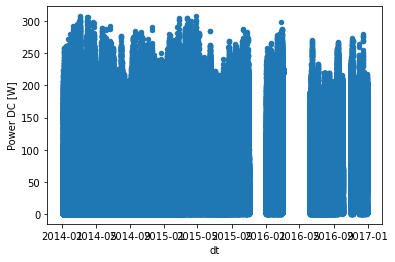

In [32]:
df.plot.scatter(x='dt', y = 'Power DC [W]')

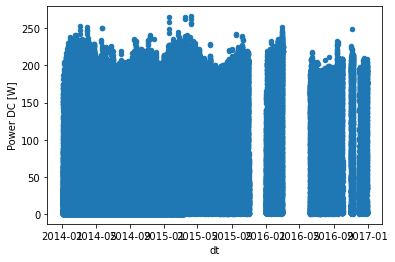

In [33]:
df_10.plot.scatter(x='dt', y = 'Power DC [W]')

In [34]:
mask_day = (df['dt'] >='2014-05-01') & (df['dt'] < '2014-05-02')
mask_week = (df['dt'] >='2015-01-15') & (df['dt'] <= '2015-01-22')
mask_month = (df['dt'] >='2015-02-01') & (df['dt'] <= '2015-02-28')
mask_year = (df['dt'] >='2015-01-01') & (df['dt'] < '2016-01-01')
mask_day_10 = (df_10['dt'] >='2014-05-01') & (df_10['dt'] < '2014-05-02')
mask_week_10 = (df_10['dt'] >='2015-01-15') & (df_10['dt'] <= '2015-01-22')
mask_month_10 = (df_10['dt'] >='2015-02-01') & (df_10['dt'] <= '2015-02-28')
mask_year_10 = (df_10['dt'] >='2015-01-01') & (df_10['dt'] < '2016-01-01')

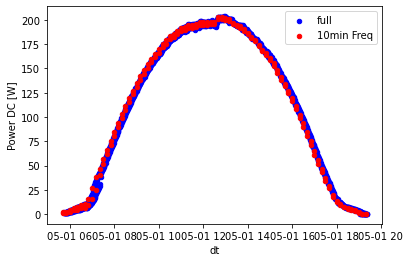

In [39]:
ax = df[mask_day].plot(kind="scatter", x="dt",y='Power DC [W]', color="b", label="full")
df_10[mask_day_10].plot(kind = 'scatter', x="dt",y='Power DC [W]', color="r", label="10min Freq", ax=ax)

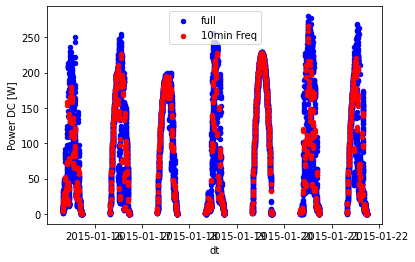

In [40]:
ax = df[mask_week].plot(kind="scatter", x="dt",y='Power DC [W]', color="b", label="full")
df_10[mask_week_10].plot(kind = 'scatter', x="dt",y='Power DC [W]', color="r", label="10min Freq", ax=ax)

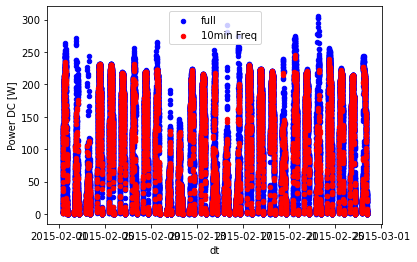

In [41]:
ax = df[mask_month].plot(kind="scatter", x="dt",y='Power DC [W]', color="b", label="full")
df_10[mask_month_10].plot(kind = 'scatter', x="dt",y='Power DC [W]', color="r", label="10min Freq", ax=ax)

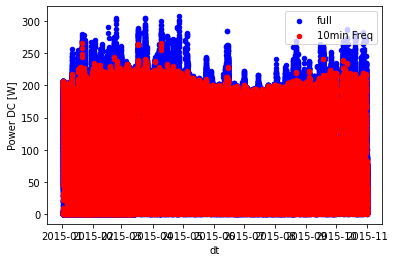

In [42]:
ax = df[mask_year].plot(kind="scatter", x="dt",y='Power DC [W]', color="b", label="full")
df_10[mask_year_10].plot(kind = 'scatter', x="dt",y='Power DC [W]', color="r", label="10min Freq", ax=ax)

Create function to make different frequency dataframes as need

In [169]:
def df_freq_avg(dataframe, frequency_in_min):
    fr = str(frequency_in_min)+'min'
    df_new = df.groupby(['PV Cell',pd.Grouper(freq=fr)]).mean().reset_index(level=0).sort_index()
    df_new.dropna(thresh=5,inplace=True)
    return df_new


In [170]:
df_20 = df_freq_avg(df,20)

In [171]:
df_20.head()

,PV Cell,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
Datetime,,,,,,,,,,,
2014-01-01 07:40:00+00:00,A,9.743860,11.852172,10.693384,1.145685,0.570175,309.144529,0.199619,4.572102,9.594737,22.739474
2014-01-01 07:40:00+00:00,B,9.746296,12.114451,10.902508,1.167566,0.562963,311.022901,0.155445,3.104527,9.855556,23.386111
2014-01-01 08:00:00+00:00,A,9.438334,47.754279,31.113866,2.485562,0.805000,308.273706,1.070625,30.593444,10.655000,28.235000
2014-01-01 08:00:00+00:00,B,9.438334,47.754279,31.113866,2.485562,0.805000,308.273706,1.065000,21.077231,11.345000,19.762500
2014-01-01 08:20:00+00:00,A,9.354167,81.612034,60.930520,4.581942,1.121667,302.671938,1.198250,35.787656,11.235000,29.875000


In [177]:
df_20[df_20.isna().any(axis=1)]

,PV Cell,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
Datetime,,,,,,,,,,,


In [172]:
df_10 = df_freq_avg(df,10)

In [173]:
df_10.isnull().sum()

PV Cell                     0
Ambient Temperature [ºC]    0
Global Radiation [W/m2]     0
Diffuse Radiation [W/m2]    0
Ultraviolet [W/m2]          0
Wind Velocity [m/s]         0
Wind Direction [º]          0
Current DC [A]              0
Power DC [W]                0
Surface Temperature [ºC]    0
Voltage DC [V]              0
dtype: int64

In [174]:
df_10[df_10.isna().any(axis=1)]

,PV Cell,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
Datetime,,,,,,,,,,,


In [175]:
df_10.describe()

,Ambient Temperature [ºC],Global Radiation [W/m2],Diffuse Radiation [W/m2],Ultraviolet [W/m2],Wind Velocity [m/s],Wind Direction [º],Current DC [A],Power DC [W],Surface Temperature [ºC],Voltage DC [V]
count,125677.000000,125677.000000,125677.000000,125677.000000,125677.000000,125677.000000,125677.000000,125677.000000,125677.000000,125677.000000
mean,20.836562,446.005318,122.366381,27.104631,2.587832,200.137015,3.531494,97.762214,29.333172,26.868150
std,5.575299,315.019668,98.916500,19.424942,1.202362,77.587737,2.568425,70.863244,9.412020,3.060749
min,3.519048,0.899312,1.605492,0.502198,0.000000,0.000000,0.000000,0.000000,2.357143,10.200000
25%,16.500000,152.920660,57.852694,9.640604,1.721667,130.333412,0.996750,26.335175,21.660000,26.835000
50%,20.868333,422.149988,95.146628,24.257743,2.566667,219.587706,3.382000,96.380087,29.410000,27.525000
75%,24.980000,713.913224,155.196662,42.974624,3.375000,259.523686,5.939250,164.598450,36.810000,28.355000
max,38.071668,1267.771204,698.234880,75.998830,9.435001,357.178000,9.679250,266.294050,61.220000,35.535000


In [176]:
df_10.to_pickle('./df_10.pkl')

In [178]:
df_20.to_pickle('./df_20.pkl')